   humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0            58.94              21.955        1653              41.187   
1            58.97              21.940        1665              40.937   
2            57.89              22.353        1707              40.375   
3            58.96              22.504        1981              40.875   
4            57.74              22.515        1868              40.812   

   temperature_wall_inside  state_air_quality  
0                   14.062                  1  
1                   14.062                  1  
2                   14.250                  1  
3                   14.375                  1  
4                   14.375                  1  


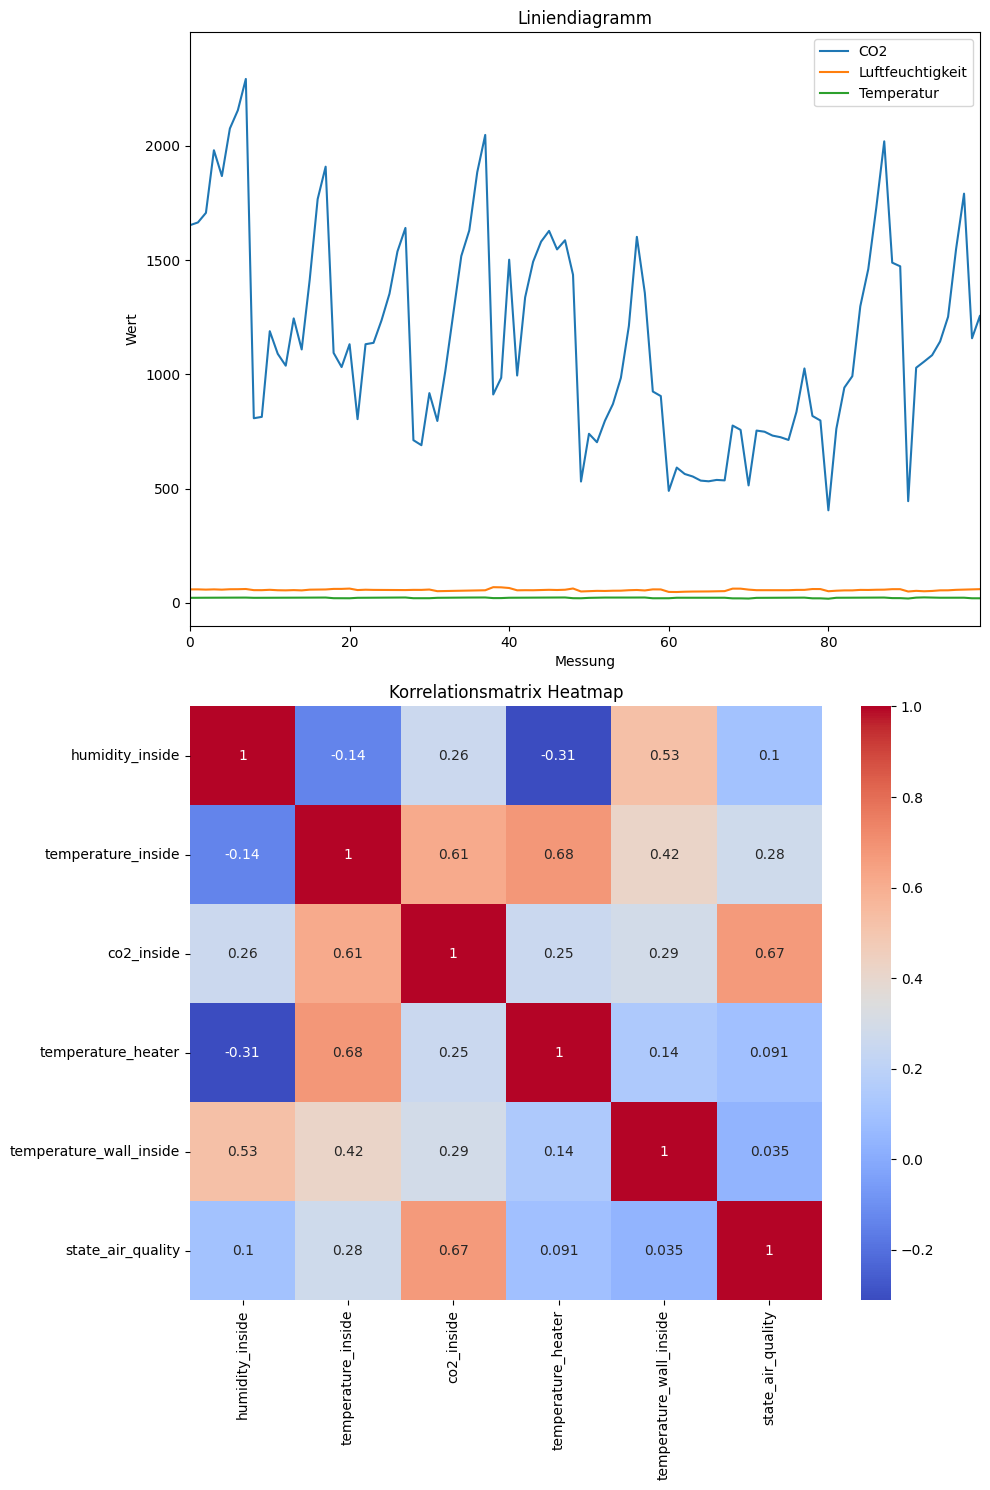

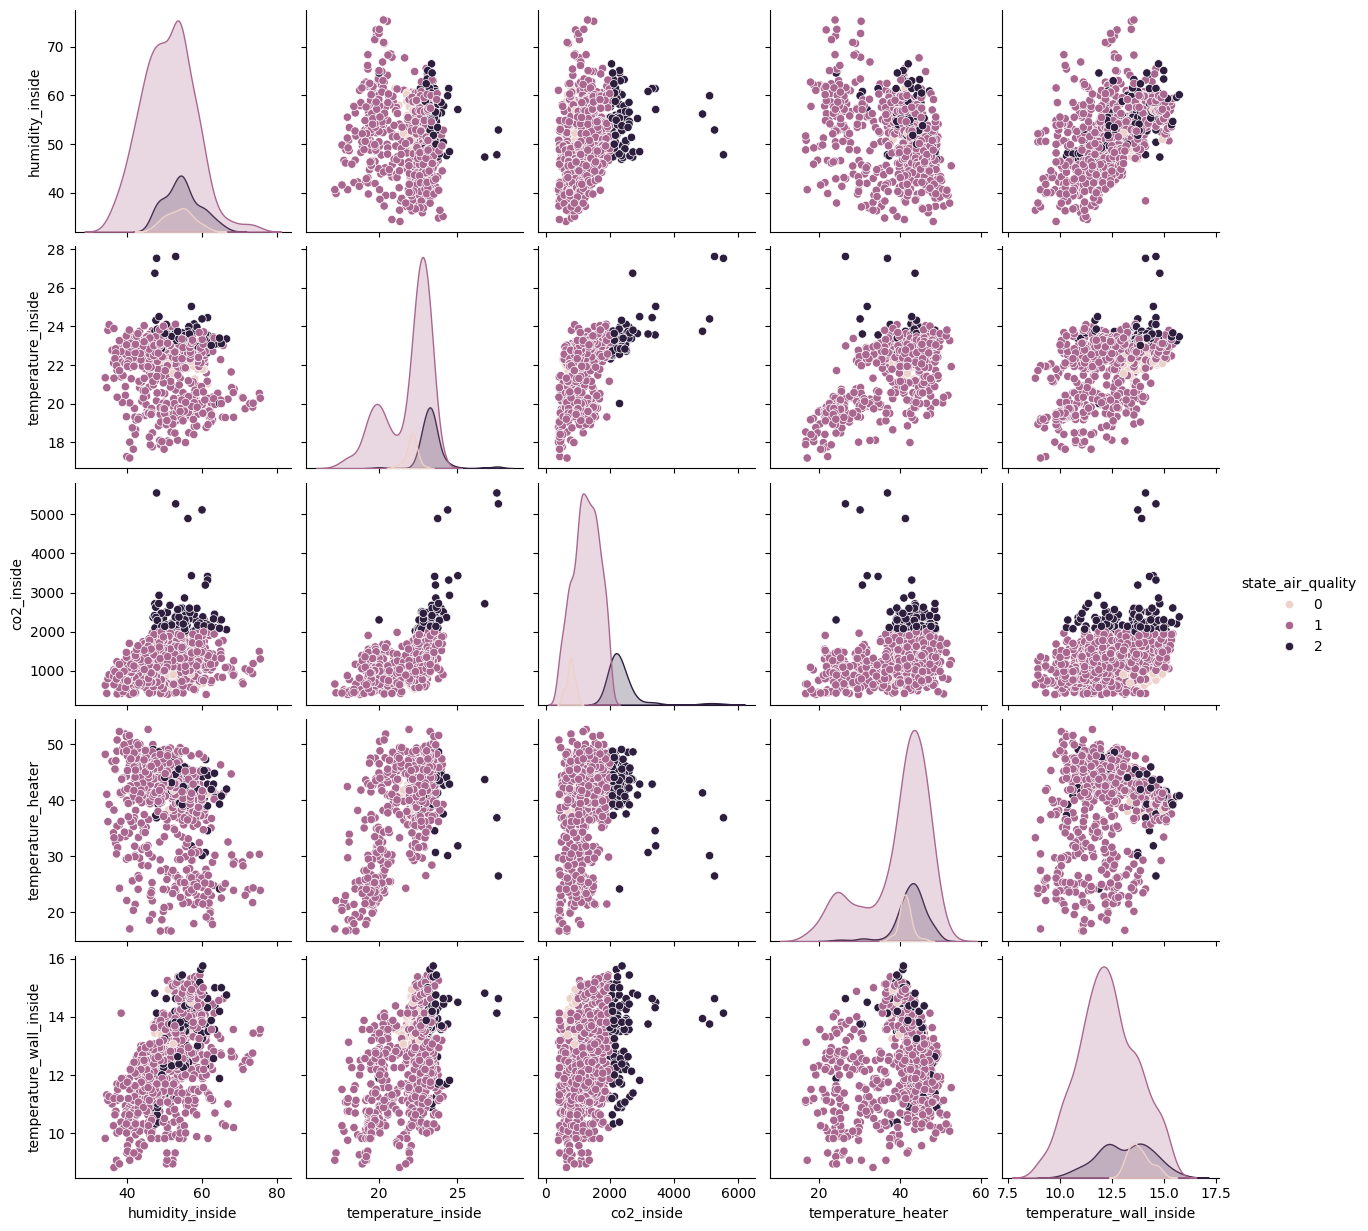


stats:
                              Max      Min          Avg       Stdev  Count
humidity_inside            75.510   34.120    51.598799    6.706102    916
temperature_inside         27.613   17.194    22.103834    1.457741    916
co2_inside               5544.000  395.000  1381.217249  588.854522    916
temperature_heater         52.625   16.687    40.034884    7.383326    916
temperature_wall_inside    15.750    8.812    12.482422    1.421408    916
state_air_quality           2.000    0.000     1.085153    0.422532    916


In [6]:
# Aufgabe 1a
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

luft = pd.read_csv("rawdata_luftqualitaet.csv")
print(luft.head())

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figwidth(10)
fig.set_figheight(15)


ax1.plot(luft['co2_inside'][:200], label="CO2")
ax1.plot(luft['humidity_inside'][:200], label="Luftfeuchtigkeit")
ax1.plot(luft['temperature_inside'][:200], label="Temperatur")
ax1.set_xlabel("Messung")
ax1.set_ylabel("Wert")
ax1.set_title("Liniendiagramm")
ax1.legend()
ax1.set_xlim(0, 99)


sb.heatmap(luft.corr(), annot=True, cmap="inferno", ax=ax2)
ax2.set_title("Korrelationsmatrix Heatmap")

plt.tight_layout()
plt.show()

# scattermatrix
sb.pairplot(luft, hue="state_air_quality")
plt.show()


# analyse
stats = pd.DataFrame({
    "Max": luft.max(),
    "Min": luft.min(),
    "Avg": luft.mean(),
    "Stdev": luft.std(),
    "Count": luft.count()
})
print("\nstats:")
print(stats)

Shapes:
X  (916, 5)
Y  (916,)
Nach der Normalisierung:
   humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0         0.599662            0.456954    0.244319            0.681730   
1         0.600387            0.455514    0.246650            0.674773   
2         0.574293            0.495153    0.254807            0.659135   
3         0.600145            0.509646    0.308021            0.673048   
4         0.570669            0.510702    0.286075            0.671295   

   temperature_wall_inside  
0                 0.756702  
1                 0.756702  
2                 0.783799  
3                 0.801816  
4                 0.801816  



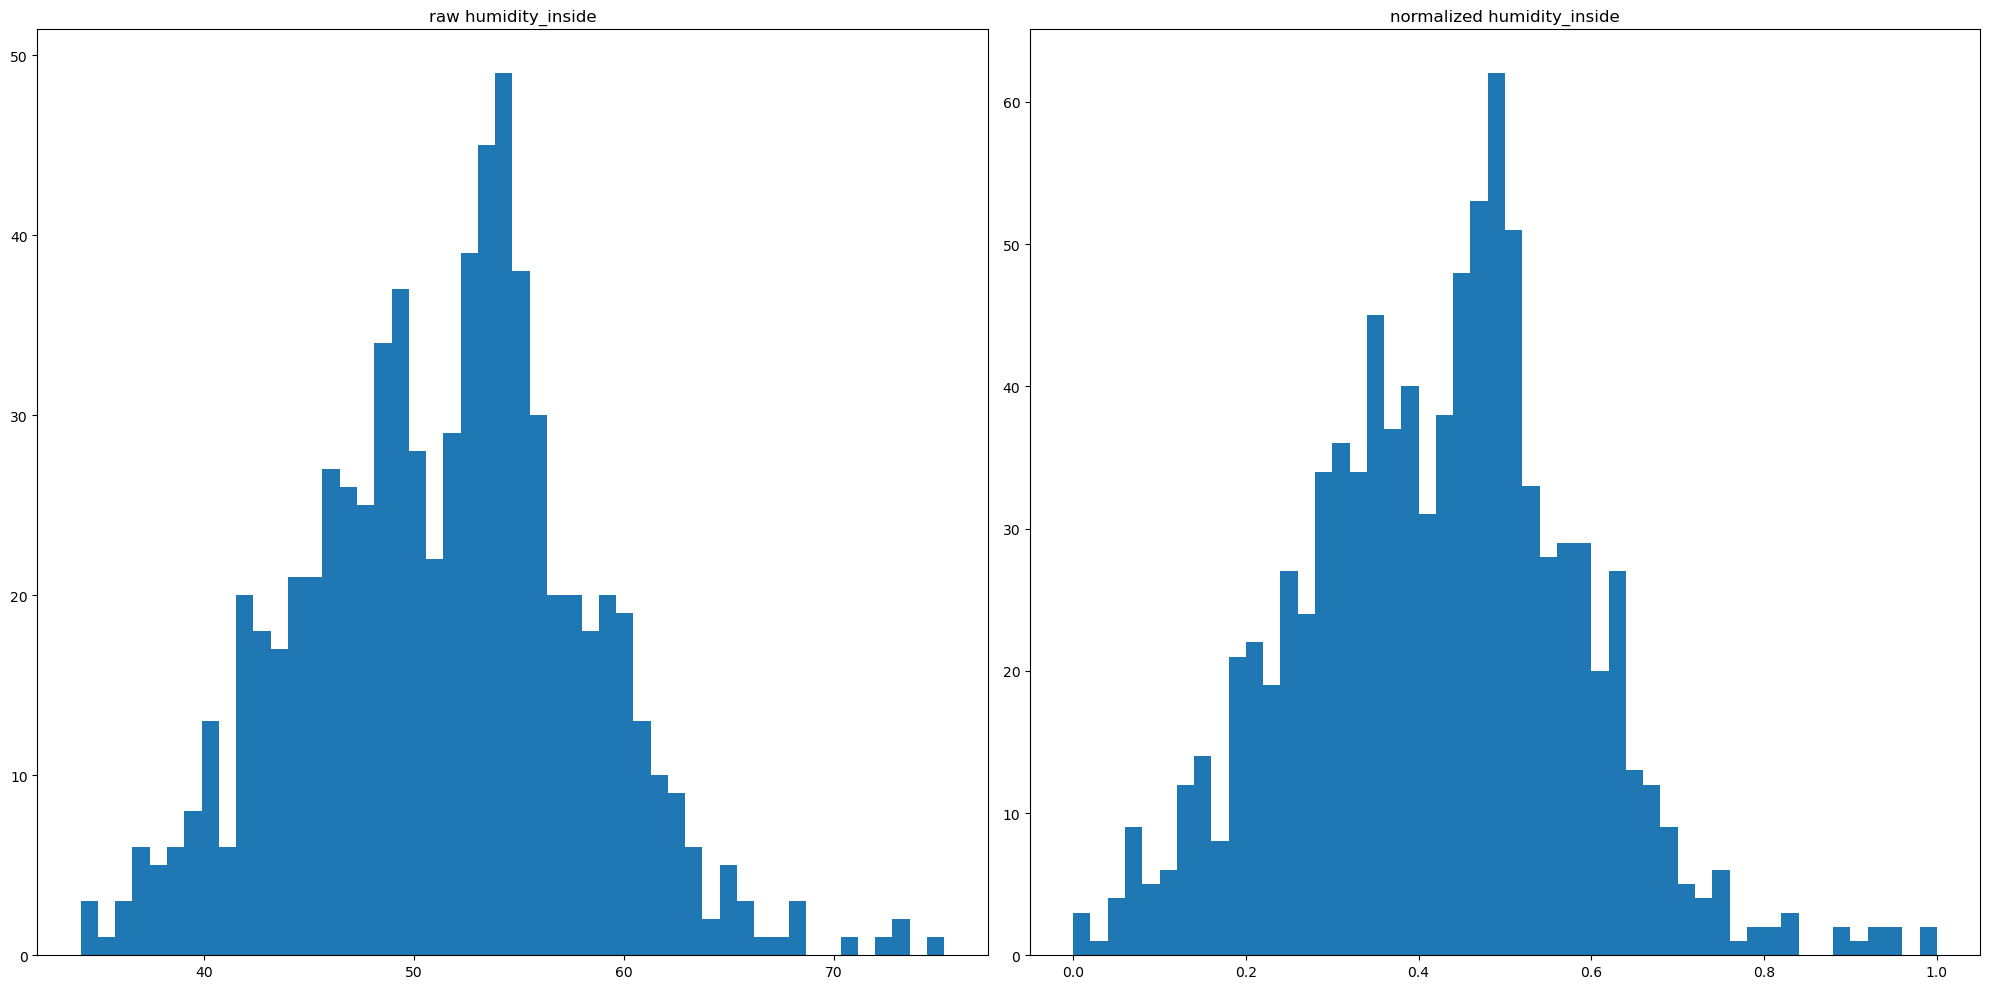

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

seed = int(random.randint(4294967295))

df = pd.read_csv("rawdata_luftqualitaet.csv")

X = df.drop("state_air_quality", axis=1)
Y = df["state_air_quality"]

XtrainingRaw, Xtesting, YtrainingRaw, Ytesting = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify=Y)

scaler = MinMaxScaler()

XTraining = scaler.fit_transform(X)
XTesting  = scaler.transform(X)

# to df for handling
XScaled = pd.DataFrame(XTraining, columns=XtrainingRaw.columns)
XTesting  = pd.DataFrame(XTesting, columns=Xtesting.columns)

print("Shapes:")
print("X ", X.shape)
print("Y ", Y.shape)

print("Nach der Normalisierung:")
print(XScaled.head())
print()



plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.hist(XtrainingRaw["humidity_inside"], bins=50) # 30 Balken
plt.title("raw humidity_inside")

plt.subplot(1, 2, 2)
plt.hist(XScaled["humidity_inside"], bins=50)
plt.title("normalized humidity_inside")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from numpy import random
import sys
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


seed = int(random.randint(4294967295))

print("Vor der Normalisierung:")
print(X_train.head())
print("===============")
print()

print("Nach der Normalisierung:")
print(X_train_scaled.head())
print("===============")


#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = MLPClassifier(
    random_state=seed
)

# trains
mlp.fit(X_train_scaled, Y_train)

# prediction
y_train_pred = mlp.predict(X_train_scaled)

print("Erste 20 vorhergesagte Klassen (Training):")
print(y_train_pred[:20]) # von 0 bis 20
print()

print("Erste 20 echten Klassen (Training):")
print(Y_train.values[:20])
print()

# prediction auf Testdaten (luftqualitaet die das Modell nicht kennt)
y_test_pred = mlp.predict(XTesting)

print("Predited Classes (Test):" + str(y_test_pred[:10]) + "\n")

print("Acctual (Test):" + str(y_test.values[:10]) + "\n")

# accuracy berechnen
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy auf dem Testdatensatz: " + str(round(test_acc,3)))

Vor der Normalisierung:
     humidity_inside  temperature_inside  co2_inside  temperature_heater  \
176            48.26              22.953        1903              43.312   
829            47.06              22.482         922              41.062   
565            52.52              22.954        1647              41.500   
24             56.40              22.764        1236              40.812   
284            61.44              24.451        3319              42.875   

     temperature_wall_inside  
176                   11.812  
829                   12.375  
565                   13.500  
24                    14.437  
284                   14.625  

Nach der Normalisierung:
   humidity_inside  temperature_inside  co2_inside  temperature_heater  \
0         0.358247            0.557880    0.292872            0.740859   
1         0.327844            0.512254    0.102350            0.678251   
2         0.466177            0.557977    0.243154            0.690439   
3         0

/usr/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
